In [1]:
import numpy as np
from numpy import genfromtxt
from itertools import combinations
import torch
import math 
from torch import nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
%run r3b_clustering_def.ipynb
%run agglomerative_def.ipynb
%run ff_models_def.ipynb
%run var1_2_agglo_edge.ipynb

#### 1) r3b

continuous numbers: [    0     0     0 ... 13498 13499 13499]
(26758, 5)
[0.0000e+00 1.0000e+00 2.0000e+00 ... 1.3497e+04 1.3498e+04 1.3499e+04]
well reco... 0.8582857989480702
---more statistics....---
fully true_reco_cluster:	 0.7184444444444444
false positive events:	 0.060444444444444446
false negative events:	 0.15866666666666668
mixed false events:	 0.06244444444444444
end of statistiscs------


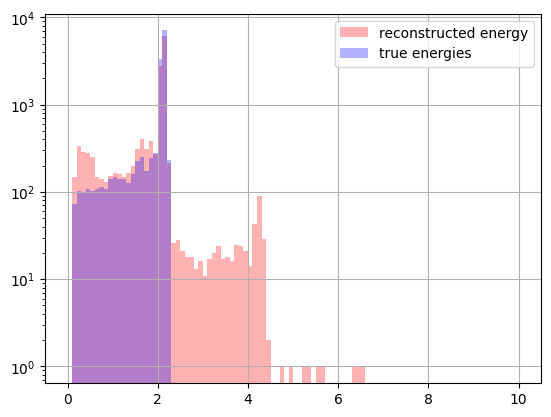

In [2]:
data = genfromtxt('./sim_data/data_2_1_mev/test_raw.txt',delimiter=',')
data[:,4] = 1  #this step is needed, I only want positive time values, so that I can use the time as a radius
# ### structure of mydata : eventnr, energy, theta, phi, hit-time
data = data*[1.,1.,3.14159/180,3.14159/180,1.]
unique_values, continuous_numbers = np.unique(data[:,0], return_inverse=True)
data[:,0] = continuous_numbers
print("continuous numbers:", continuous_numbers)
out_cluster_r3b = run_r3b_clustering(data,0.25)
#foo = plot_true_reco(data)
foo_comb = get_true_combinatorics(data)
foo_ene = get_true_reco_ene(data,out_cluster_r3b,foo_comb)

***

#### 2) agglo

13497
Progress: 0.00%
Progress: 22.22%
Progress: 44.44%
Progress: 66.67%
Progress: 88.89%
well reco... 0.8912512037928736
---more statistics....---
fully true_reco_cluster:	 0.7602222222222222
false positive events:	 0.051111111111111114
false negative events:	 0.17044444444444445
mixed false events:	 0.018222222222222223
end of statistiscs------


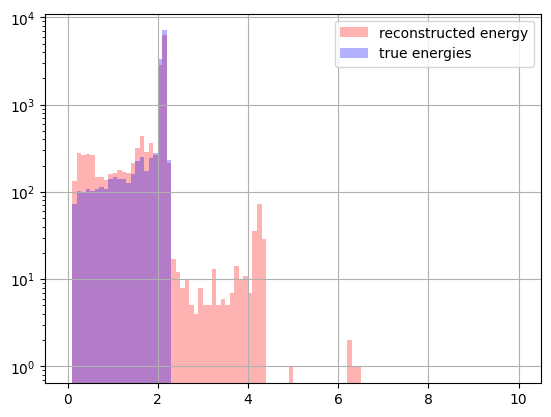

In [3]:
data = genfromtxt('./sim_data/data_2_1_mev/test_raw.txt', delimiter=',')
data[:,4] = data[:,4]+4500  #this step is needed, I only want positive time values, so that I can use the time as a radius
#my_data[:,4] = 1  #this step is needed, I only want positive time values, so that I can use the time as a radius

# ### structure of mydata : eventnr, energy, theta, phi, hit-time
data = data*[1.,1.,3.14159/180,3.14159/180,1.]
unique_values, continuous_numbers = np.unique(data[:,0], return_inverse=True)
data[:,0] = continuous_numbers
out_cluster_agglo = run_agglo_clustering(data,3540)
foo_comb = get_true_combinatorics(data)
foo_ene = get_true_reco_ene(data,out_cluster_agglo,foo_comb)

***

#### 3a) Edge - no time

In [ ]:
training_data = genfromtxt('./sim_data/data_2_1_mev/training_raw.txt', delimiter=',')
print("training data read")
## some data manipulation needed
training_data[:,4] =(training_data[:,4]-np.min(training_data[:,4]))/(np.max(training_data[:,4])-np.min(training_data[:,4]))
unique_values, continuous_numbers = np.unique(training_data[:,0], return_inverse=True)
training_data[:,0] = continuous_numbers
training_data[:,2] = training_data[:,2]*math.pi/180.
training_data[:,3] = training_data[:,3]*math.pi/180.
training_data[:,4] = 1  ## set time to 1, not sensitive to time, TODO: remove later, just a test
training_true = get_true_combinatorics(training_data)
print("I start manipulating data...")
input_training_data = manip_data_ff(training_data,12) ##second param gives number of features
print("after input traingin def")
pred_training = train_two_hidden_model(input_training_data,torch.FloatTensor(training_true),12,1000,5e-3,100)
print("pred_training finished")
training_reco = get_true_reco_ene(training_data,pred_training[0].tolist(),training_true)


###testing
val_data = genfromtxt('./sim_data/data_2_1_mev/test_raw.txt', delimiter=',')
## some data manipulation needed
val_data[:,4] =(val_data[:,4]-np.min(val_data[:,4]))/(np.max(val_data[:,4])-np.min(val_data[:,4]))
unique_values, continuous_numbers = np.unique(val_data[:,0], return_inverse=True)
val_data[:,0] = continuous_numbers
val_data[:,2] = val_data[:,2]*math.pi/180.
val_data[:,3] = val_data[:,3]*math.pi/180.
val_data[:,4] = 1 ## set time to 1, not sensitive to time, TODO: remove later, just a test
val_true = get_true_combinatorics(val_data)
input_val_data = manip_data_ff(val_data,12) ##second param gives number of features

pred_val = validate_two_hidden_model(input_val_data,torch.FloatTensor(val_true),12,1000,5e-3,100)

val_reco = get_true_reco_ene(val_data,pred_val[0].tolist(),val_true)

training data read
I start manipulating data...


/tmp/ipykernel_545097/903825733.py:42: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:261.)
  input_data = torch.FloatTensor(ll)


after input traingin def
Model's state_dict:
linear.weight 	 torch.Size([1000, 12])
linear.bias 	 torch.Size([1000])
another_linear.weight 	 torch.Size([100, 1000])
another_linear.bias 	 torch.Size([100])
another_linear_two.weight 	 torch.Size([100, 100])
another_linear_two.bias 	 torch.Size([100])
linear_back.weight 	 torch.Size([1, 100])
linear_back.bias 	 torch.Size([1])
Progress: 0.00%
Progress: 0.20%
Progress: 0.40%
Progress: 0.60%
Progress: 0.80%
Progress: 1.00%
Progress: 1.20%
Progress: 1.40%
Progress: 1.60%
Progress: 1.80%
Progress: 2.00%
Progress: 2.20%
Progress: 2.40%
Progress: 2.60%
Progress: 2.80%
Progress: 3.00%
Progress: 3.20%
Progress: 3.40%
Progress: 3.60%
Progress: 3.80%
Progress: 4.00%
Progress: 4.20%
Progress: 4.40%
Progress: 4.60%
Progress: 4.80%
Progress: 5.00%
Progress: 5.20%
Progress: 5.40%
Progress: 5.60%
Progress: 5.80%
Progress: 6.00%
Progress: 6.20%
Progress: 6.40%
Progress: 6.60%
Progress: 6.80%
Progress: 7.00%
Progress: 7.20%
Progress: 7.40%
Progress: 7.60%

***

#### 3b) Edge with time

In [ ]:
training_data = genfromtxt('./sim_data/data_2_1_mev/training_raw.txt', delimiter=',')
## some data manipulation needed
training_data[:,4] =(training_data[:,4]-np.min(training_data[:,4]))/(np.max(training_data[:,4])-np.min(training_data[:,4]))
unique_values, continuous_numbers = np.unique(training_data[:,0], return_inverse=True)
training_data[:,0] = continuous_numbers
training_data[:,2] = training_data[:,2]*math.pi/180.
training_data[:,3] = training_data[:,3]*math.pi/180.
#training_data[:,4] = 1  ## set time to 1, not sensitive to time, TODO: remove later, just a test
print("before training true")
training_true = get_true_combinatorics(training_data)
input_training_data = manip_data_ff(training_data,12) ##second param gives number of features

pred_training = train_two_hidden_model(input_training_data,torch.FloatTensor(training_true),12,1000,5e-3,100)

training_reco = get_true_reco_ene(training_data,pred_training[0].tolist(),training_true)


###testing
val_data = genfromtxt('./sim_data/data_2_1_mev/test_raw.txt', delimiter=',')
## some data manipulation needed
val_data[:,4] =(val_data[:,4]-np.min(val_data[:,4]))/(np.max(val_data[:,4])-np.min(val_data[:,4]))
unique_values, continuous_numbers = np.unique(val_data[:,0], return_inverse=True)
val_data[:,0] = continuous_numbers
val_data[:,2] = val_data[:,2]*math.pi/180.
val_data[:,3] = val_data[:,3]*math.pi/180.
#val_data[:,4] = 1 ## set time to 1, not sensitive to time, TODO: remove later, just a test
val_true = get_true_combinatorics(val_data)
input_val_data = manip_data_ff(val_data,12) ##second param gives number of features

pred_val = validate_two_hidden_model(input_val_data,torch.FloatTensor(val_true),12,1000,5e-3,100)

val_reco = get_true_reco_ene(val_data,pred_val[0].tolist(),val_true)

***

#### 4) Agglo + Edge

In [ ]:
res_var2_2_1mev = var2_agglo_edge("./sim_data/data_2_1_mev/false_neg_2_1_mev.txt","./sim_data/data_2_1_mev/test_raw.txt","./sim_data/data_2_1_mev/precluster_test.txt")

***

#### 5) R3b + Edge no time

In [ ]:
res_var2_r3b_edge = var2_r3b_edge("./sim_data/data_2_1_mev/false_neg_uniform_r3b.txt","./sim_data/data_2_1_mev/test_raw.txt","./sim_data/data_2_1_mev/precluster_r3b_test.txt")